In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.manifold import TSNE
from tqdm import tqdm
from matplotlib.colors import ListedColormap


# Objectif du TP

Dans ce TP, nous allons travailler tout d'abord avec le dataset "diabetes_train.csv" qui contient des données médicales relevées pour 653 patients. 

Chaque ligne de ce dataset correspond à des données médicales obtenues  pour chaque patient (taux de glucose dans le sang, pression artérielle, indice de masse corporelle, etc.). 

La dernière colonne correspond à la classe pour chaque patient (0 : abence de diabète et 1 : présence de diabète).

A partir de ces données d'entraînement, le but est de construire un modèle de prédiction qui permettra de faire des diagnostics pour de nouveaux patients qui arrivent à l'hopital.

Ce modèle de prédiction sera ici un modèle de classification binaire, entraîné par apprentissage supervisé.

Une fois votre modèle validé, vous pourrez le tester sur des données de test ("diabetes_test.csv"), correspondant aux mêmes caractéristiques relevées pour 115 nouveaux patients pour lesquels la classe 0 ou 1 est inconnue.


# Chargement des données d'entraînement

In [15]:
# 1) Chargez les données d'entraînement dans un objet Dataframe pandas (fonction pd.read_csv) et affichez les. Trois onglets apparaissent :
# - Preview : affichage des répartitions des valeurs de chaque variable
# - Visualize : affichage de courbes et d'histogrammes pour différents couples de variables
# - Raw output : données brutes chargées dans le Dataframe

train_data = pd.read_csv("diabetes_train.csv")

train_data 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,138.0,82.0,NaN,NaN,40.1,0.236,28,0
1,3,90.0,78.0,NaN,NaN,42.7,0.559,21,0
2,2,109.0,92.0,NaN,NaN,42.7,0.845,54,0
3,1,71.0,78.0,50.0,45.0,33.2,0.422,21,0
4,0,167.0,NaN,NaN,NaN,32.3,0.839,30,1
...,...,...,...,...,...,...,...,...,...
648,9,112.0,82.0,24.0,NaN,28.2,1.282,50,1
649,0,93.0,60.0,NaN,NaN,35.3,0.263,25,0
650,2,117.0,90.0,19.0,71.0,25.2,0.313,21,0
651,1,157.0,72.0,21.0,168.0,25.6,0.123,24,0


In [16]:
# 2) Affichez le descriptif des données (méthode describe).

# On doit voir apparaître un certain nombre de statistiques descriptives pour les différentes variables
# (moyenne, médiane, nombre de données manquantes, etc.)

train_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,653.000000,649.000000,623.000000,464.000000,332.000000,643.000000,653.000000,653.000000,653.000000
mean,3.836141,121.338983,72.333868,29.301724,157.539157,32.376983,0.483703,33.140888,0.344564
std,3.361061,30.303186,12.463874,10.689790,118.072645,6.853305,0.334246,11.813157,0.475590
min,0.000000,44.000000,24.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,21.000000,80.250000,27.450000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,30.000000,127.000000,32.000000,0.389000,29.000000,0.000000
75%,6.000000,139.000000,80.000000,36.250000,190.000000,36.600000,0.647000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.329000,72.000000,1.000000


# Pré-traitement et visualisation

In [18]:
# 3) Affichez la liste des noms des caractéristiques pour chaque patient (sans la colonne "Outcome" qui correspond à la classe 0 ou 1).
# Assignez cette liste à une variable nommée 'features'.

features = train_data.columns[:-1]

features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [19]:
# 4) Exécutez le code suivant permettant d'appliquer une transformation des données. Identifiez la cause de l'erreur.

# TODO décommenter
# X_embedded = TSNE(n_components=2, random_state=42).fit_transform(train_data[features].values)
# print(X_embedded.shape)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [21]:
# 5) Que fait ce bloc de calcul ?

data_np = train_data.values        

for i in range(train_data.shape[1]):
    column = data_np[:, i]
    column = [np.random.choice(column[np.isfinite(column)]) if np.isnan(j) else j for j in column]
    data_np[:, i] = column
    
train_data = pd.DataFrame(data_np, columns = train_data.columns)
features = train_data.columns[:-1]

## Visualisation avec TSNE

In [22]:
# 6) Lancer ce bloc de calcul qui permet d'appliquer la méthode TSNE. 

# La méthode TSNE permet de projeter les données dans un nouvel espace de dimension plus réduite (ici en dimension 2), 
# de telle sorte que les données proches dans l'espace d'origine aient une probabilité élevée d'être proche dans le nouvel espace. 
# Pour plus de détails sur cette méthode, voir https://dataanalyticspost.com/Lexique/t-sne/

tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(train_data[features].values)
print(X_embedded.shape)

(653, 2)


In [23]:
# 7) Lancer ce bloc de calcul qui permet de visualiser les données dans le nouvel espace de dimension 2.

# Les points de couleur bleue correspondent aux individus de la classe 0 (absence de diabète) et les points de couleur jaune 
# correspondent aux individus de la classe 1 (présence de diabète).

# Qu'observez-vous au niveau de la répartition des points jaunes et bleus dans le nouvel espace ? 
# Que peut-on en déduire concernant les chances de succès d'une méthode de classification binaire ?

px.scatter(X_embedded, x=0, y=1, color=train_data['Outcome'])

## Séparation des données

In [57]:
# On veut s'assurer que le modèle fonctionnera aussi pour de nouveaux patients. On sépare donc les données en un jeu d'entraînement et un jeu de 
# validation.

# 8) Séparer les données de manière à avoir 80 % des données dans l'ensemble d'entraînement et 20 % pour l'ensemble de validation.
# On appelera respectivement ces ensembles diabetes_train et diabetes_valid.

diabetes_train=train_data.sample(frac=0.8,random_state=90) 

diabetes_valid=train_data.drop(diabetes_train.index)





In [58]:
# 9) Séparer pour chaque ensemble les features (caractéristiques des patients) et la cible à prédire ("outcome").
# On notera X_train, Y_train et X_valid, Y_valid respectivement les features et les cibles pour l'ensemble d'entraînement et de validation.

X_train = diabetes_train[diabetes_train.columns[:-1]]
Y_train = diabetes_train[diabetes_train.columns[-1]]

X_valid = diabetes_valid[diabetes_train.columns[:-1]]
Y_valid = diabetes_valid[diabetes_train.columns[-1]]

print(X_train.shape, X_valid.shape)




(522, 8) (131, 8)


In [59]:
# 10) Renormaliser les données de façon à ce que chaque colonne des datasets d'entraînement et de validation soit de moyenne nulle 
# et d'écart type 1


mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train = (X_train - mean)/std

print(X_train.mean(axis=0))
print(X_train.std(axis=0))

X_valid = (X_valid - mean)/std

print(X_valid.mean(axis=0))
print(X_valid.std(axis=0))




Pregnancies                -3.402982e-17
Glucose                     1.633432e-16
BloodPressure               5.104474e-17
SkinThickness              -4.083579e-17
Insulin                    -6.550741e-17
BMI                         5.376712e-16
DiabetesPedigreeFunction    3.402982e-18
Age                         1.293133e-16
dtype: float64
Pregnancies                 1.0
Glucose                     1.0
BloodPressure               1.0
SkinThickness               1.0
Insulin                     1.0
BMI                         1.0
DiabetesPedigreeFunction    1.0
Age                         1.0
dtype: float64
Pregnancies                 0.111416
Glucose                     0.071344
BloodPressure               0.026467
SkinThickness               0.045806
Insulin                     0.062374
BMI                         0.088467
DiabetesPedigreeFunction    0.026107
Age                         0.134094
dtype: float64
Pregnancies                 0.966537
Glucose                     1.142271
B

# KPPV: K plus proches voisins

La méthode des K plus proches voisins est un algorithme d'apprentissage supervisé que l'on va utiliser pour classifier les points du jeu de données diabètes. À partir d'un point x dont on ne connait pas la classe (Outcome), on cherche les k plus proches voisins de x dans le jeu d'entraînement selon la distance euclidienne. On calcule la moyenne de la valeur de Outcome parmi les k plus proches voisins. Si elle est inférieure à 0.5, on considère que x appartient à la classe 0. Sinon, on considère que x appartient à la classe 1.

https://fr.wikipedia.org/wiki/Méthode_des_k_plus_proches_voisins

https://scikit-learn.org/stable/modules/neighbors.html#classification

## Implémentation

In [60]:
# 11) Définissez une fonction euclidean_distance(v1, v2), calculant la distance euclidienne entre les vecteurs v1 et v2.

def euclidean_distance(v1,v2):

    distance = 0
    for i in range(v1.shape[0]):
        distance += (v1[i] - v2[i])**2

    return np.sqrt(distance)






In [61]:
# 12) Tester la fonction euclidean_distance avec deux points du dataset d'entraînement de façon à vérifier si calcul de distance fonctionne bien.

euclidean_distance(X_train.iloc[0,:],X_train.iloc[1,:])




3.761180283660784

In [62]:
# 13) Complétez la fonction suivante, qui sélectionne les k plus proches voisins du point x_test dans l'ensemble des points contenus dans X_train. 

def neighbors(X_train, y_label, x_test, k):
    list_distances =  []

    # A compléter pour calculer la liste de toutes les distances entre le point "x_test" et tous les points contenus dans "X_train".
    # Toutes ces distances seront ajoutées dans "list_distances"

    for i in range(X_train.shape[0]):

        distance = euclidean_distance(x_test,X_train.iloc[i,:])

        list_distances.append(distance)




    df = pd.DataFrame()

    df["label"] = y_label
    df["distance"] = list_distances

    df = df.sort_values(by="distance")

    return df.iloc[:k,:]


In [63]:
# 14) Pour le premier point de l'ensemble de validation, affichez ses 5 plus proches voisins de l'ensemble d'entraînement.

neighbors(X_train, Y_train, X_valid.iloc[0,:], 5 )

,label,distance
66,1.0,2.459954
336,1.0,2.523334
595,0.0,2.528641
276,1.0,2.529794
58,1.0,2.552105


In [64]:
# 15) Compléter la fonction suivante qui prend en entrée un dataframe contenant les plus proches voisins d'un point avec leur classe 
# (obtenu par la méthode neighbors) et qui renvoie la classe prédite pour ce point.

def prediction(neighbors):

    if(neighbors["label"].mean() < 0.5):

        return 0

    else:

        return 1


In [65]:
# 16) Afficher la prédiction du modèle pour le premier point de l'ensemble de validation

prediction(neighbors(X_train, Y_train, X_valid.iloc[0,:], 5 ))



1

## Evaluation

In [95]:
# 17) Compléter la fonction evaluation qui permet de calculer et d'afficher le nombre de vrais positifs, de faux positifs, de vrais négatifs et 
# de faux négatifs pour un ensemble de validation donné en entrée. La fonction evaluation calcule également la métrique accuracy, qui correspond
# à la proportion de prédictions correctes.


def evaluation(X_train, Y_train, X_valid, Y_valid, k, verbose=True):

    TP=0 # prediction égale à 1 et cible égale à 1 (vrai positif)
    FP=0 # prediction égale à 1 et cible égale à 0 (faux positif)

    TN=0 # prediction égale à 0 et cible égale à 0 (vrai négatif)
    FN=0 # prediction égale à 0 et cible égale à 1 (faux négatif)

    total = 0
    
    for i in range(X_valid.shape[0]):

        nearest_neighbors = neighbors(X_train, Y_train, X_valid.iloc[i], k)

        if ((prediction(nearest_neighbors) == 1) and (Y_valid.iloc[i]==1)): 
            TP += 1
        elif ((prediction(nearest_neighbors) == 1) and (Y_valid.iloc[i]==0)):
            FP+=1
        elif ((prediction(nearest_neighbors) == 0) and (Y_valid.iloc[i]==0)): 
            TN+=1
        elif ((prediction(nearest_neighbors) == 0) and (Y_valid.iloc[i]==1)):
            FN+=1

        total += 1 

    accuracy = (TP + TN)/total

    if verbose:
        print("Vrais positifs : " + str(TP)) 
        print("Faux positifs : " + str(FP)) 
        print("Vrais négatifs : " + str(TN))
        print("Faux négatifs : " + str(FN))

        print("Accuracy:" + str(accuracy))

    return accuracy
    
print(Y_valid)

evaluation(X_train, Y_train, X_valid, Y_valid, 5)

2      0.0
3      0.0
5      0.0
14     0.0
17     0.0
      ... 
626    0.0
637    0.0
639    1.0
645    0.0
648    1.0
Name: Outcome, Length: 131, dtype: float64
Vrais positifs : 25
Faux positifs : 19
Vrais négatifs : 67
Faux négatifs : 20
Accuracy:0.7022900763358778


0.7022900763358778

In [67]:
# 18) Lancer cette fonction d'évaluation pour différentes valeurs de k entre 1 et 19 de 2 en 2 et stocker les valeurs d'accuracy obtenues 
# dans une liste

list_accuracy = []

for k in tqdm(range(1,19,2)):

    list_accuracy.append(evaluation(X_train, Y_train, X_valid, Y_valid, k, verbose=False))

print()
print(list_accuracy)   







100%|██████████| 9/9 [01:32<00:00, 10.31s/it]
[0.6412213740458015, 0.7022900763358778, 0.7022900763358778, 0.6793893129770993, 0.7022900763358778, 0.6946564885496184, 0.7099236641221374, 0.7099236641221374, 0.7099236641221374]



In [68]:
# 19) Tracer une courbe qui montre l'évolution de l'accuracy en fonction de k. 

# Quelle valeur de k vous semble la plus pertinente ?

px.line(x=range(1,19,2), y=list_accuracy, labels={'x':'k', 'y':'accuracy'})

100%|██████████| 1326/1326 [01:26<00:00, 15.31it/s]
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



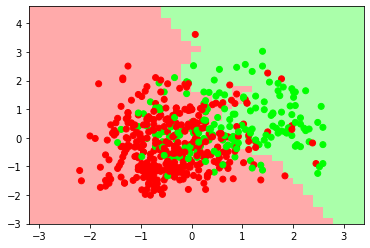

In [69]:
# 20) Affichage des frontières de décision


def plot_decision(X, y, k):


    h = 0.2


    x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1


    xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))

    xx0_flat = xx0.ravel()
    xx1_flat = xx1.ravel()

    X_entry = np.stack((xx0_flat, xx1_flat), axis=1)

    y_pred = np.zeros((xx0_flat.shape[0]))


    for i in tqdm(range(X_entry.shape[0])):

    
        nearest_neighbors = neighbors(pd.DataFrame(X), y, pd.DataFrame(X_entry).iloc[i], k)
        y_pred[i] = prediction(nearest_neighbors)

    preds = y_pred.reshape(xx0.shape)


    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

    plt.figure()
    plt.pcolormesh(xx0, xx1, preds, cmap=cmap_light)
    plt.xlim(xx0.min(), xx0.max())
    plt.ylim(xx1.min(), xx1.max())

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.show()


plot_decision(X_train[["Glucose","BMI"]].values, Y_train, 19)

100%|██████████| 1326/1326 [01:25<00:00, 15.59it/s]
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



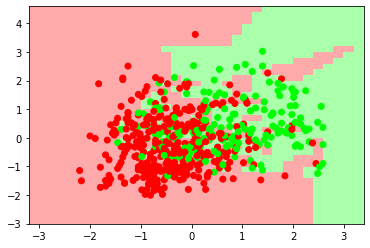

In [70]:
plot_decision(X_train[["Glucose","BMI"]].values, Y_train, 1)

# Application du modèle sur des données de test

In [100]:
# 21) Charger le fichier diabetes_test_data.csv et appliquer votre modèle pour prédire les classes de chaque patient.

X_test = pd.read_csv("diabetes_test_data.csv")

Y_test = pd.read_csv("diabetes_test_target.csv")["Outcome"]


data_np = X_test.values        

for i in range(X_test.shape[1]):
    column = data_np[:, i]
    column = [np.random.choice(column[np.isfinite(column)]) if np.isnan(j) else j for j in column]
    data_np[:, i] = column
    
X_test = pd.DataFrame(data_np, columns = X_test.columns)



# 22) Pensez à normaliser ces données d'entrée.

X_test = (X_test - mean)/std

#print(Y_test)


# 23) Calculer la précision en test de votre modèle avec le fichier diabetes_test_target.csv


evaluation(X_train, Y_train, X_test, Y_test, 5)





Vrais positifs : 24
Faux positifs : 14
Vrais négatifs : 58
Faux négatifs : 19
Accuracy:0.7130434782608696


0.7130434782608696

# Arbre de décision

On va maintenant utiliser un modèle de type arbre de décision pour classifier les valeurs du jeu de données. À partir des données d'entraînement, le modèle construit un ensemble de règles arborescentes pour séparer les données selon des critères portant sur les valeurs des différentes colonnes.

https://fr.wikipedia.org/wiki/Arbre_de_décision

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html



## Entraînement

In [83]:
tree = DecisionTreeClassifier(max_depth=5, criterion="entropy")
tree.fit(X_train.values, Y_train.values)


DecisionTreeClassifier(criterion='entropy', max_depth=5)

## Évaluation

In [98]:
def evaluation2( X_valid, Y_valid, tree_model, verbose=True):

    TP=0 # prediction égale à 1 et cible égale à 1 (vrai positif)
    FP=0 # prediction égale à 1 et cible égale à 0 (faux positif)

    TN=0 # prediction égale à 0 et cible égale à 0 (vrai négatif)
    FN=0 # prediction égale à 0 et cible égale à 1 (faux négatif)

    total = 0

    y_pred = tree_model.predict(X_valid)

    for i in range(X_valid.shape[0]):

        

        if ((y_pred[i] == 1) and (Y_valid.iloc[i]==1)): 
            TP += 1
        elif ((y_pred[i] == 1) and (Y_valid.iloc[i]==0)):
            FP+=1
        elif ((y_pred[i] == 0) and (Y_valid.iloc[i]==0)): 
            TN+=1
        elif ((y_pred[i] == 0) and (Y_valid.iloc[i]==1)):
            FN+=1

        total += 1 

    accuracy = (TP + TN)/total

    if verbose:
        print("Vrais positifs : " + str(TP)) 
        print("Faux positifs : " + str(FP)) 
        print("Vrais négatifs : " + str(TN))
        print("Faux négatifs : " + str(FN))

        print("Accuracy:" + str(accuracy))

    return accuracy
    
evaluation2( X_valid, Y_valid, tree)

Vrais positifs : 20
Faux positifs : 11
Vrais négatifs : 75
Faux négatifs : 25
Accuracy:0.7251908396946565


0.7251908396946565

## Affichage de l'arbre de décision appris

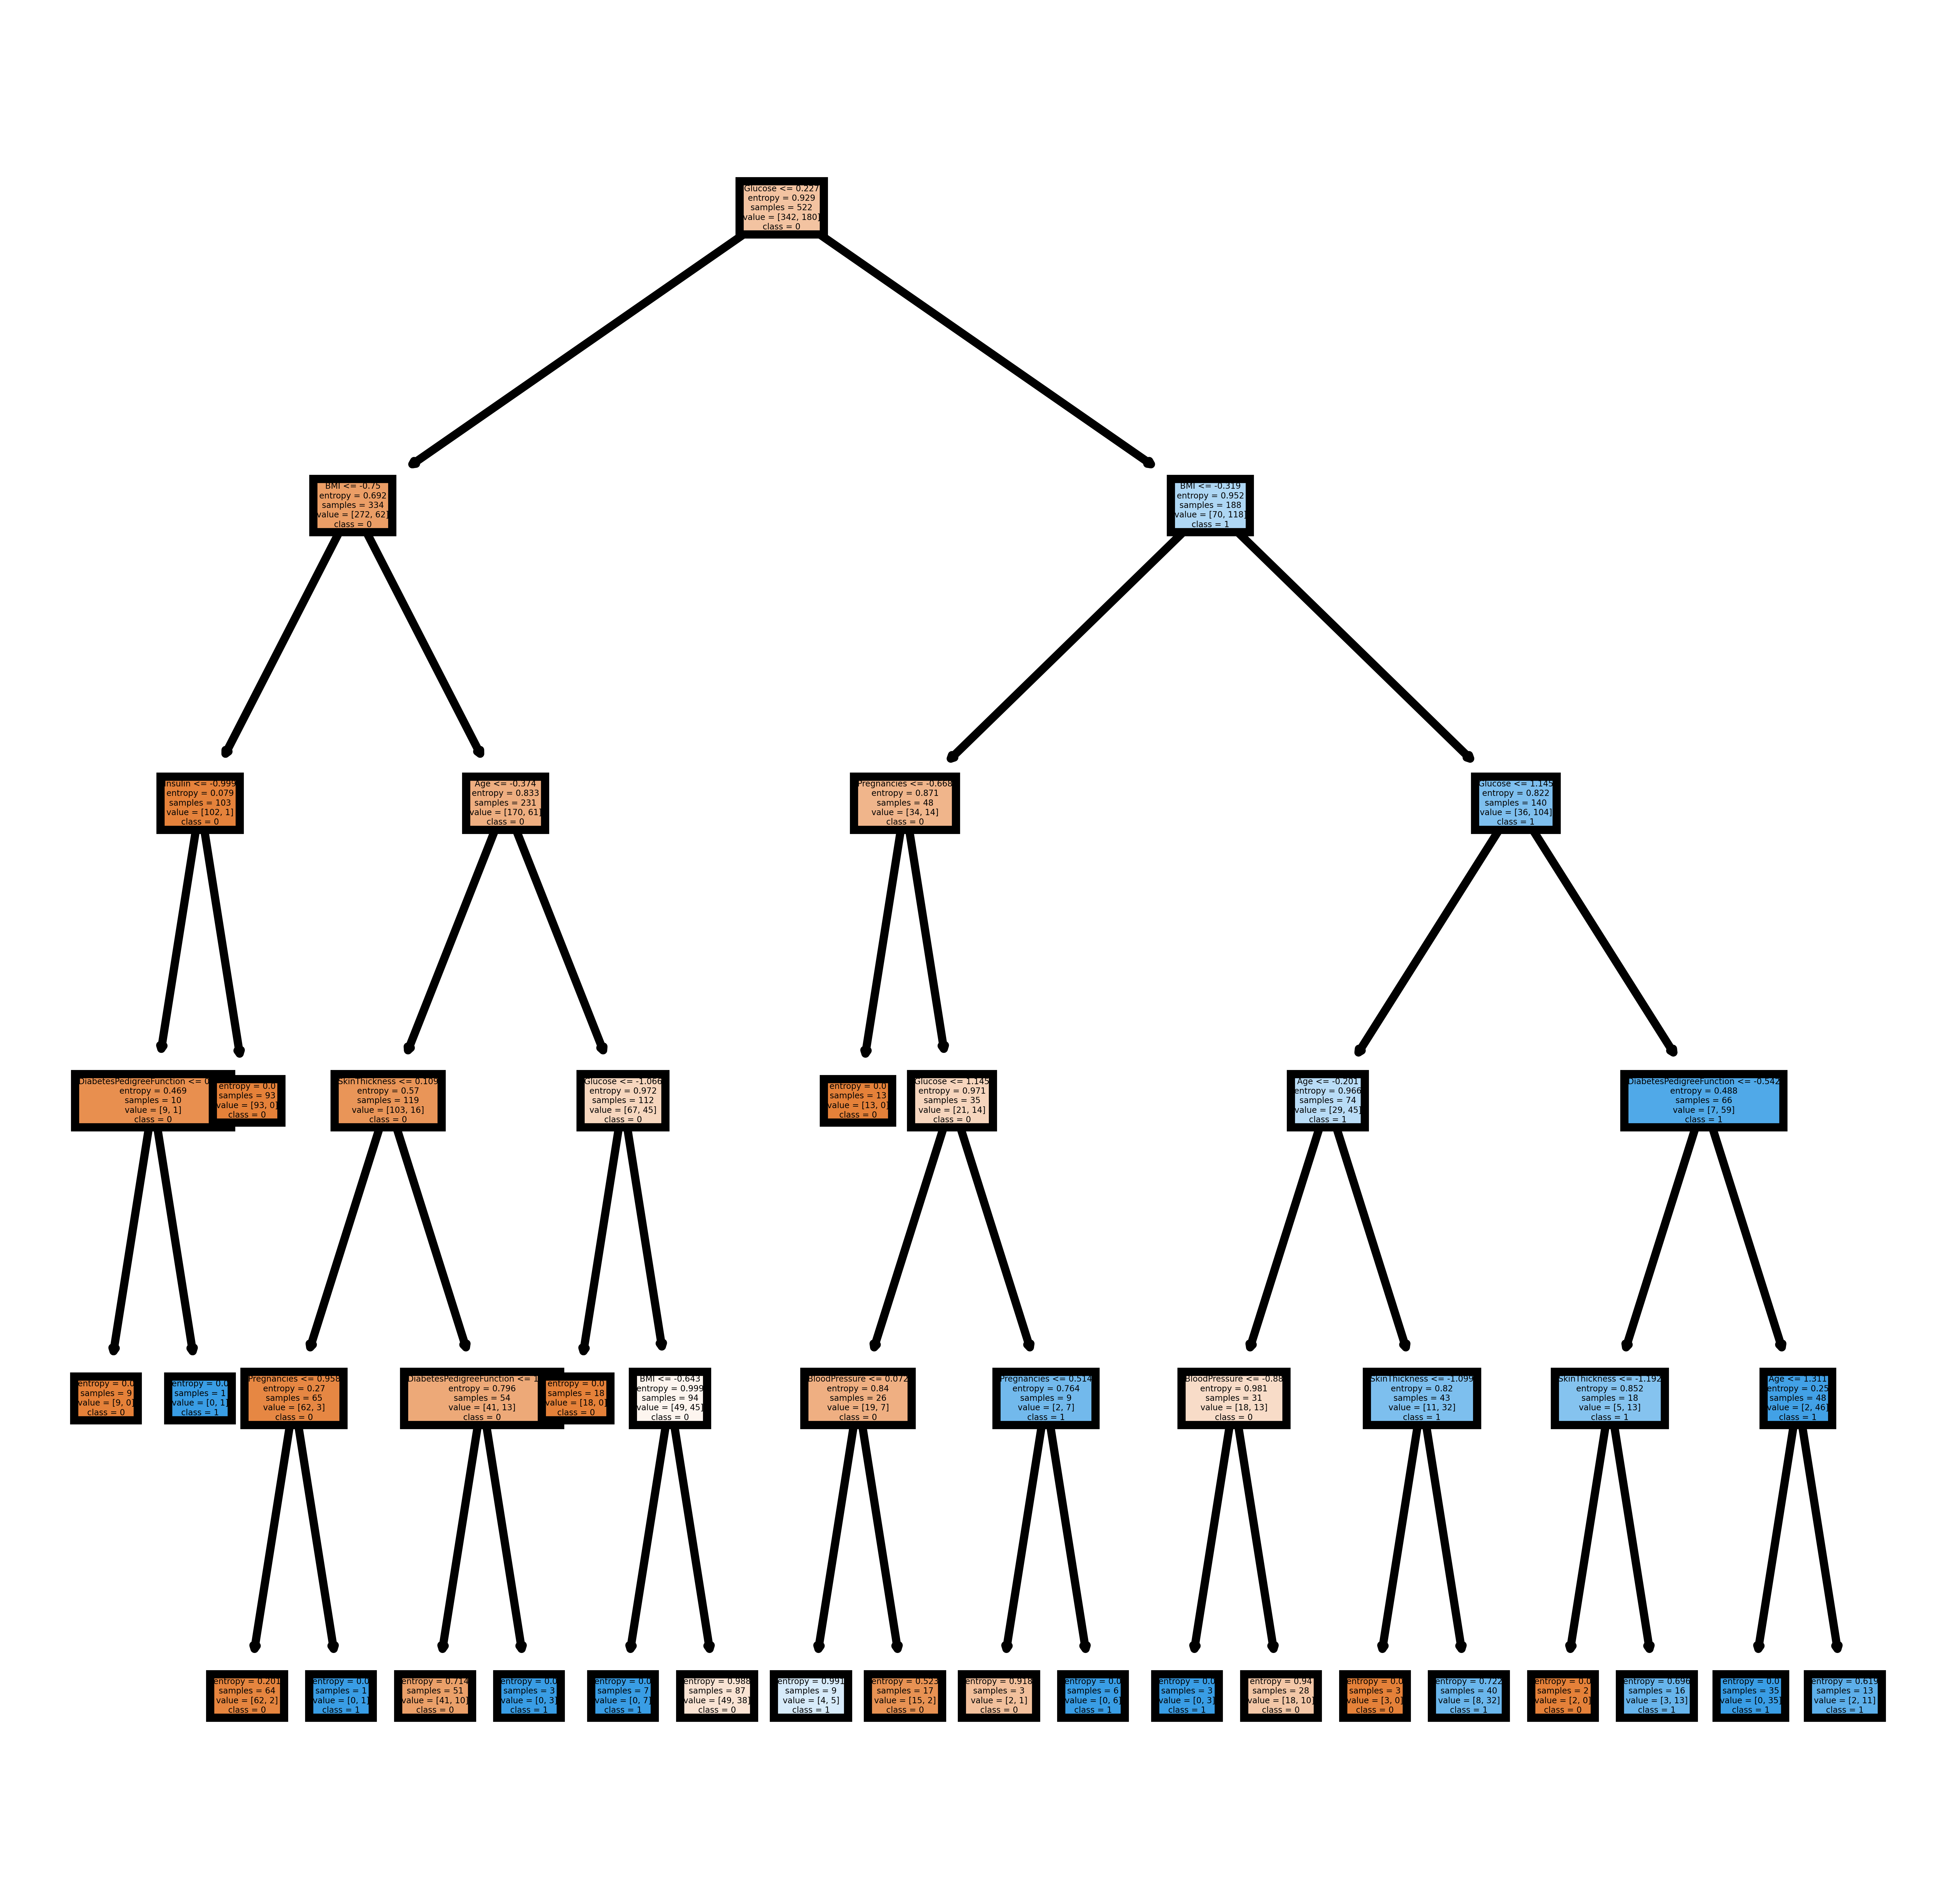

In [86]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=2000)

plot_tree(tree,
          feature_names = features, 
          class_names=["0", "1"],
          filled = True);

plt.savefig("tree.png")

## Visualisation des données : BMI en fonction de Glucose

In [87]:
px.scatter(X_train, x='Glucose', y='BMI', color=Y_train)

In [99]:
evaluation2( X_test, Y_test, tree)

Vrais positifs : 21
Faux positifs : 13
Vrais négatifs : 59
Faux négatifs : 22
Accuracy:0.6956521739130435


0.6956521739130435

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bf61bc82-145a-41ea-8cae-5e9ab8c61c23' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>